# Sa-NN-dra

Neural nets for chronic back pain. Multiple nets are attempted here to see what can find the best accuracy in prediction of a pain level (0-10) from features throughout the day. These can be things like excercises to help the back, any pain medication or walks (to name a few)

* 1st Idea: Use a standard neural net with a 2 neuron hidden layer. 

### First things first, lets load the `.csv` file and see what we are dealing with

In [85]:
import numpy as np
import pandas as pd

data_path = './'
data_frame_origonal = pd.read_csv(data_path + 'Sandras_Back_Exercises.csv')
data_frame = data_frame_origonal.copy()

data_frame


,date,Paracetamol in morn?,Pain level am,Curls,Cobra pushes,Cat pose,Side leg bend,Leg stretches,Pelvic tilts,Core leg pushes,Core both legs off floor,Squats,Walk,twinges,Jazuzzi (Y/N),Back massager #,Pain level pm
0,6.4.20,0,5,1,1,1,1,1,0,1,1,0,40,0,1,0,5
1,7.4.20,0,6,1,1,1,1,1,0,1,1,1,30,0,0,0,5
2,8.4.20,0,6,1,0,1,1,1,0,1,1,0,0,0,0,0,6
3,9.4.20,0,7,1,1,1,1,1,0,1,0,0,0,0,0,0,7
4,10.4.20,0,7,1,2,1,1,1,0,0,0,0,45,0,0,0,6
5,11.4.20,0,6,1,1,1,1,1,1,1,0,0,30,0,0,0,6
6,12.4.20,0,7,2,2,2,2,1,0,1,0,0,0,0,0,0,6
7,13.4.20,0,7,1,1,1,1,1,0,0,0,0,0,1,1,0,7
8,14.4.20,0,6,2,1,1,1,1,0,0,0,1,80,0,0,0,7
9,15.4.20,0,7,2,1,1,1,1,0,0,0,0,30,1,0,0,7


# Train & Test data

The last column of the dataset, *'Pain level pm'* are the y values that we want. 

Next, we want to split the X and y values into our train and testing data. This will be done as a 80/20 split, with the y values as the pain level in the evening. 


In [84]:
from sklearn.model_selection import train_test_split

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

n,m = data_frame.shape

X = data_frame.drop(columns = data_frame.columns[16])

#Convert the date string to a datetime format, then convert to the days since first entry
X['date'] = pd.to_datetime(X['date'],format='%d.%m.%y') 
X['date_delta'] = (X['date'] - X['date'].min())  / np.timedelta64(1,'D')

#Now we have date_delta, we will remove the origonal dates for the net 
X = X.drop(columns = X.columns[0])
new_index = ['date_delta'] 
new_index.extend(list(X.columns[0:15]))
X = X.reindex(columns=new_index)

y = data_frame.drop(columns = data_frame.columns[0:16])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#convert the y values to one-hot encoded vectors
categorical_y_train = keras.utils.to_categorical(y_train)
categorical_y_test = keras.utils.to_categorical(y_test)

## Attempt 1 - Dense Neural Net

A neural net equal to the number of features in the dataframe, a hidden layer of 2 neurons and then an output of 10 neurons for each class. 


Epoch 1/20
41/41 [==============================] - 0s 1ms/step - loss: 2.0444 - accuracy: 0.3659
Epoch 2/20
41/41 [==============================] - 0s 85us/step - loss: 2.0376 - accuracy: 0.3659
Epoch 3/20
41/41 [==============================] - 0s 88us/step - loss: 2.0302 - accuracy: 0.3659
Epoch 4/20
41/41 [==============================] - 0s 75us/step - loss: 2.0234 - accuracy: 0.3659
Epoch 5/20
41/41 [==============================] - 0s 69us/step - loss: 2.0161 - accuracy: 0.3659
Epoch 6/20
41/41 [==============================] - 0s 75us/step - loss: 2.0091 - accuracy: 0.3659
Epoch 7/20
41/41 [==============================] - 0s 76us/step - loss: 2.0022 - accuracy: 0.3659
Epoch 8/20
41/41 [==============================] - 0s 77us/step - loss: 1.9954 - accuracy: 0.3659
Epoch 9/20
41/41 [==============================] - 0s 72us/step - loss: 1.9887 - accuracy: 0.3659
Epoch 10/20
41/41 [==============================] - 0s 67us/step - loss: 1.9818 - accuracy: 0.3659
Epoch 11/2

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


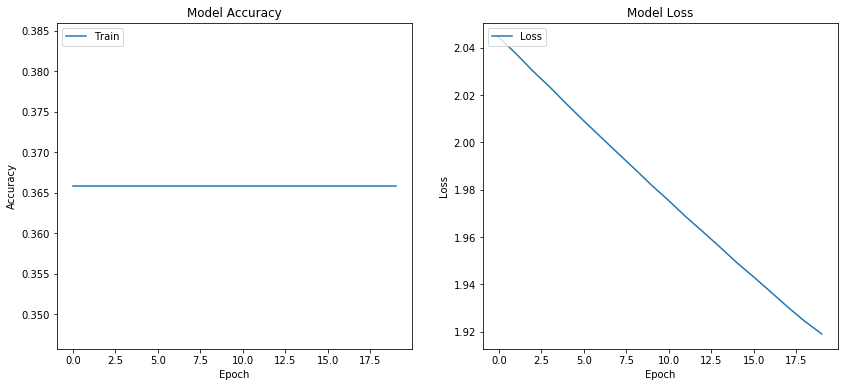

In [82]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt

model1 = Sequential()
model1.add(Dense(64, activation='sigmoid',use_bias='true',input_dim=X_train.shape[1]))
model1.add(Dense(2,activation='sigmoid',use_bias='true',input_dim=64))
model1.add(Dense(categorical_y_train.shape[1], activation='softmax',input_dim=2))

#SGD as the optimisation method, with a learning rate of 0.01
sgd = SGD(lr=0.01)

#categorical cross-entropy for the loss function as it is a 10-class problem
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


#Train the model
history = model1.fit(X_train,categorical_y_train, epochs=20,batch_size=16,verbose=1)

#lets see our accuracy and loss
fig = plt.figure(figsize = (14,6))
fig.add_subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')

fig.add_subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Loss'], loc='upper left')

fig.show()

# No better than a 3-sided dice

The current accuracy from applying a dence neural net to the problem yields an accuracy of about 37%, which is far from ideal. What is needed now is to incorporate the use of time, activation functions, model architechture and other hyperparameters to find a better model.